<a href="https://colab.research.google.com/github/ramonVDAKKER/teaching-quantitative-finance/blob/main/notebooks/black_scholes_pde_numerical_approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantitative Finance - solving the Black-Scholes Partial Differential Equation numerically

## 1. Background and setup

### 1.1 Setup

We consider the standard Black-Scholes market in which two assets are traded. A risky asset (stock) is traded with price process described by the SDE 
$$dS_t = \mu S_t dt +\sigma S_t dW_t,$$
where $S_0=s_0>0$, $W$ is a standard Brownian motion, and $\mu,\sigma>0$. The second asset is a money-market-account described by
$$dB_t = r B_t dt,$$
where $r$ denotes the (deterministic) interest and $B_0=b_0>0$. As usual, 'frictionless' trading is assumed (no restrictions on short selling, no restrictions on fractional positions, trading in continuous-time, no transaction costs). 

### 1.2 Self-financing Markovian portfolios and the Black-Scholes Partial Differential Equation

Consider a maturity $T>0$ (corresponding to the expiration dates of options that we will consider). 
For the above market we consider self-financing, Markovian trading strategies. So the price/value of the portfolio at time $t$ can be written as $V_t = F(t, S_t)$ for a fixed function $F$. 

We have seen that such a function $F$ is a solution to the equation (the Black-Scholes Partial Differential Equations)
$$
\frac{\delta G}{\delta t}(t,s) + r s \frac{\partial G}{\partial
s}(t,s) + \frac{1}{2}\sigma^2 s^2 \frac{\partial^2 G}{\partial
s^2}(t,s) -r G(t,s)=0\quad \forall s\in (0,\infty),\quad \forall t\in [0,T].\qquad(\star)
$$ 

### 1.3 Application to pricing of European options

If we want to price, using the no-arbitrage principle, a European option that has payoff $h(S_T)$ at maturity $T$, then we can exploit the Black-Scholes Partial Differential Equation as follows:


*   Solve the PDE $(\star)$ under the boundary condition $G(s,T) = h(s)$ for all $s>0$. Denote the solution by $F$.
*   In this case $F(t,S_t)$ is the value/price of the self-financing portfolio that has value $h(S_T)$ at $t=T$.
*   No-arbitrage thus implies that the price of the option, for $t\in [0,T)$, must be given by $p_t = F(t,S_t)$.



### 1.4 Need for numerical approach to solve the PDE


Sometimes it is possible to find an analytical solution to the PDE in combination with a boundary condition (for example, the Black-Scholes formula for the price of a European call option).
*   The Black-Scholes PDE can be transformed into the heat equation. The heat equation is a PDE that is relevant in physics and because of that a well-studied object in mathematics and physics.
*   So if you need to price a derivative with payoff $h(S_T)$ you can try to rewrite the problem in terms of the heat equation and to consult the literature related to the heat equation whether an analytical solution is known for this boundary condition.

In case we are not able to obtain a closed-form solution to the PDE, we can resort to numerical techniques to obtain an approximation to the solution. Below we discuss one of the simplest numerical algorithms.


## 2. The algorithm

Divide the time-interval $[0, T]$ into $N$ equally sized subintervals of length $dt$. The price of the underlying asset will in principle take values in $[0,\infty)$. In the algorithm an artificial limit,  $S_{\text{max}}$ is introduced. The size of
$S_{\text{max}}$ requires experimentation. It is not hard to imagine that this choice should be related to the shape of $s\mapsto h(s)$.
Next, the interval $[0, S_{\text{max}}]$ is divided into $M$ equally sized subintervals of length $ds$.
So we are going to approximate the continuous space $[0, T]\times [0,\infty)$ by a finite grid $(t_i, s_j )$, where $t_i = i\cdot dt$ and
$s_j = j\cdot ds$, $i\in\{0, 1, . . . ,N\}$ and $j\in\{0, 1, . . . ,M\}$.

In the following we abbreviate $G(t_i,s_j)$ to $G_{i,j}$.
Next we use the following approximations to the derivatives,
$$\frac{\partial G}{\partial s}(t_i,s_j)\approx \frac{ G_{i,j+1} -G_{i,j-1}} {2 ds }, $$
$$
\frac{\partial^2 G}{\partial s^2}(t_i,s_j)\approx\frac{ G_{i,j+1} -2G_{i,j} +G_{i,j-1}} { (ds)^2 },
$$
$$
\frac{\partial G}{\partial t}(t_i,s_j)\approx \frac{ G_{i+1,j} -G_{i,j}} {dt }.
$$


Inserting these approximations into the Black-Scholes PDE $(\star)$ we arrive at
\begin{align*}
\frac{ G_{i+1,j} -G_{i,j}} {dt } + rj\cdot ds \frac{ G_{i,j+1} -G_{i,j-1}} {2 ds }  + \frac{1}{2}\sigma^2 (j\cdot ds)^2
\frac{ G_{i,j+1} -2G_{i,j} +G_{i,j-1}} { (ds)^2 }
-r G_{i,j}=0.
\end{align*}
Note that the $G_{i,j}$ pop up linearly. We will exploit this by setting up a asystem of linear equations from which we will solve for the $G_{i,j}$.

Introducing
\begin{align*}
a_j &= \frac{1}{2}rjdt - \frac{1}{2}\sigma^2j^2dt, \\
b_j &= 1 + \sigma^2j^2 dt + rdt, \\
c &= -\frac{1}{2}rjdt - \frac{1}{2}\sigma^2 j^2dt,
\end{align*}
we can rewrite the equation as follows:
\begin{align*}
a_j G_{i,j-1}+b_j G_{i,j}+c_j G_{i,j+1}- G_{i+1,j}=0.
\end{align*}

Fixing $i\in\{0,\dots,N-1\}$ and reformulating the equations of the previous display into matrix notation we obtain

\begin{align*}
\begin{pmatrix}
b_1 & c_1 & 0   & 0   & 0   & \cdots   & 0 \\
a_2 & b_2 & c_2 & 0   & 0   & \cdots   & 0 \\
0   & a_3 & b_3 & c_3 & 0   & \cdots   & 0 \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
\vdots & \vdots & \ddots & \ddots & \ddots & \ddots & \vdots \\
0      &   0    &0 &0 & a_{M-2} & b_{M-2} & c_{M-2}  \\
0 & 0 & 0 & 0 & 0 & a_{M-1} & b_{M-1}
\end{pmatrix}
\begin{pmatrix}
G_{i,1} \\ \vdots \\ \vdots \\ \vdots \\ \vdots \\ G_{i,M-1}
\end{pmatrix}
=
\begin{pmatrix}
G_{i+1,1}-a_1 G_{i,0}
\\
G_{i+1,2}
\\
\\ \vdots \\ \vdots \\  G_{i+1,M-2} \\ G_{i+1,M-1}-c_{M-1} G_{i+1,M}
\end{pmatrix}.
\end{align*}

The boundary values $G_{i,0}$ and $G_{i,M}$ should be derived by ad hoc arguments and are specific for the derivative of interest.
For example, for a European put option, $h(s)=\max\{K-s,0\}$, we set $G_{i,0}=K$ and $G_{i,M}=0$.

Below we consider a basic implementation in Python.

## 3. Implementation in Python

### 3.1 Imports

In [1]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.stats import norm

### 3.2 Algorithm

In [2]:
class NumericalProxyPDE:
    """Class implementing the algorithm that has been described above."""

    def __init__(
        self,
        Smax: float,
        dS: float,
        K: float,
        dT: float,
        T: float,
        r: float,
        sigma: float,
    ):

        self.M = int(np.ceil(Smax / dS))  # number of points in grid for stockprice
        self.ds = Smax / self.M  # mesh in grid for stockprice
        self.N = int(np.ceil(T / dT))  # number of points in grid for time
        self.dt = T / self.N  # mesh in grid for time
        self.t = np.linspace(0, T, self.N + 1)
        self.S = np.linspace(0, Smax, self.M + 1)
        J = np.arange(1, self.M - 1 + 1)
        self.a = 0.5 * r * J * self.dt - 0.5 * sigma ** 2 * J ** 2 * self.dt
        b = 1 + sigma ** 2 * self.dt * J ** 2 + r * self.dt
        self.c = -0.5 * r * self.dt * J - 0.5 * sigma ** 2 * self.dt * J ** 2
        self.A = diags([self.a[1:], b, self.c[:-1]], offsets=[-1, 0, 1])
        self.G = np.zeros((self.N + 1, self.M + 1))  # time x stock price
        self.Smax = Smax

    def solve_pde(self, boundary_equation_maturity, boundary_equation_smax):

        # set boundary conditions (for payoff at maturity):
        self.G[self.N, :] = boundary_equation_maturity(
            self.S
        )  # boundary at t=T, i.e. pay-off
        self.G[:, self.M] = boundary_equation_smax(
            self.t
        )  # boundary a t  and S=Smax, note that this approximation only makes sense if Smax is large enough!
        self.G[:, 0] = boundary_equation_maturity(0)  # if S = 0 then S_t is constant
        # set up difference equation

        # solve V recursively
        for i in range(self.N, 0, -1):
            y = np.ravel(self.G[i, 1 : self.M])
            y[0] = y[0] - self.a[0] * boundary_equation_maturity(0)
            y[-1] = y[-1] - self.c[-1] * boundary_equation_smax(self.Smax)

            self.G[i - 1, 1 : self.M] = np.transpose(spsolve(self.A, y))


class SolvePDEBoundaryNumerically(NumericalProxyPDE):
    def __init__(
        self,
        Smax: float,
        dS: float,
        K: float,
        dT: float,
        T: float,
        r: float,
        sigma: float,
        boundary_equation_maturity,
        boundary_equation_smax,
    ):

        super().__init__(Smax, dS, K, dT, T, r, sigma)
        self.solve_pde(boundary_equation_maturity, boundary_equation_smax)

    def plot_price(self):

        f, ax = plt.subplots(figsize=(25, 7))
        ax.plot(self.S, self.G[0, :])
        ax.set_title("Price option at t=0 as function of $s_0$")
        ax.set_xlabel("s_0")
        ax.set_ylabel("price option")
        return ax

    def price_specific_point(self, t, s):
        """Determines price option at time t for stock price S_t=s"""

        nearest_idx_stock_price = np.where(abs(self.S - s) == abs(self.S - s).min())[0][
            0
        ]  # find index of point in stock price grid closest to S_0
        nearest_idx_time = np.where(abs(self.t - t) == abs(self.t - t).min())[0][
            0
        ]  # find index of point in stock price grid closest to S_0
        stock_price = self.S[
            nearest_idx_stock_price
        ]  # If you directly want the element of array (array) nearest to the given number (num)
        time = self.t[nearest_idx_time]
        print(
            f"The closest point to specified s on the grid is {stock_price} and the closest point to specified t is {time}"
        )
        price = self.G[nearest_idx_time, nearest_idx_stock_price]
        print(
            f"The (approximation to the) price of the option at t={time}, S_t={stock_price} is {price}"
        )
        return price

### 3.2.1 Application to European put option

In [3]:
s_0 = 100
strike = 90
sigma = 0.15
r = 0.01
T = 3
put_boundary_maturity = lambda s: np.maximum(strike - s, 0)
put_boundary_smax = lambda t: 0
put = SolvePDEBoundaryNumerically(
    Smax=250,
    dS=0.01,
    K=strike,
    dT=0.01,
    T=T,
    r=r,
    sigma=sigma,
    boundary_equation_maturity=put_boundary_maturity,
    boundary_equation_smax=put_boundary_smax,
)

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:145: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


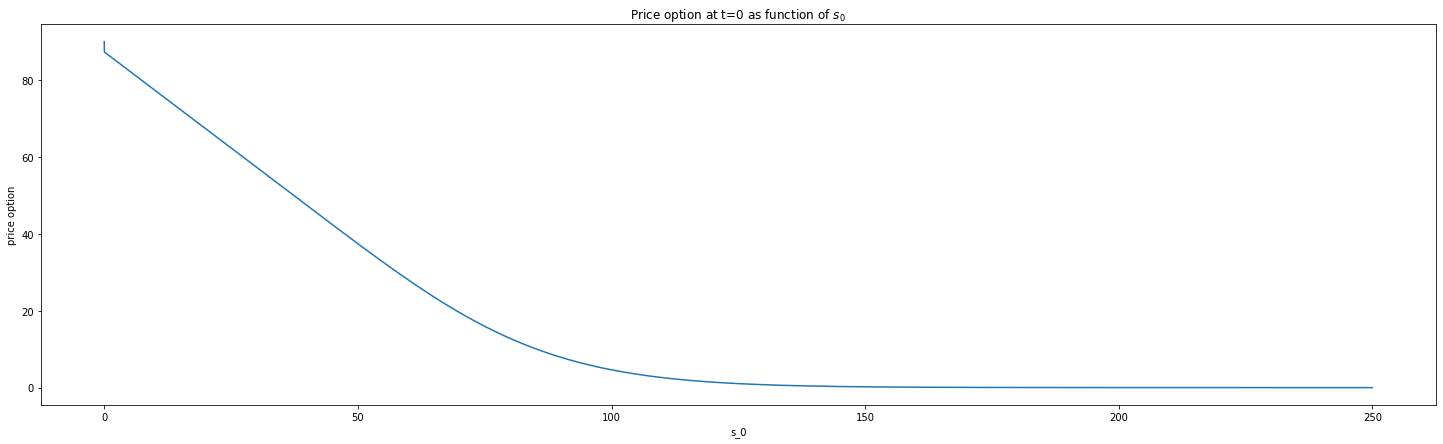

In [4]:
ax = put.plot_price()

In [5]:
t = 0.5
s = 120
put.price_specific_point(t, s)

The closest point to specified s on the grid is 120.0 and the closest point to specified t is 0.5
The (approximation to the) price of the option at t=0.5, S_t=120.0 is 1.0607490479022321


1.0607490479022321

Let us compare this numerical approximation to the output of the Black-Scholes formula.

In [6]:
class BlackScholesOptionPrice:
    """Class for Black-Scholes price of European put and call options."""

    def __init__(self, strike: float, r: float, sigma: float):

        self.r = r
        self.sigma = sigma
        self.strike = strike

    def _d1_and_d2(self, current_stock_price, time_to_maturity):
        """Calculates auxiliary d_1 and d_2 which enter the N(0, 1) cdf in the pricing formulas"""

        d1 = (
            np.log(current_stock_price / self.strike)
            + (self.r + 0.5 * self.sigma ** 2) * time_to_maturity
        ) / (self.sigma * np.sqrt(time_to_maturity))
        d2 = d1 - self.sigma * np.sqrt(time_to_maturity)
        return d1, d2

    def price_put(self, current_stock_price, time_to_maturity):
        """Calculates price of European put option"""

        d1, d2 = self._d1_and_d2(current_stock_price, time_to_maturity)
        return np.exp(-self.r * time_to_maturity) * self.strike * norm.cdf(
            -d2
        ) - current_stock_price * norm.cdf(-d1)

    def price_call(self, current_stock_price, time_to_maturity):
        """Calculates price of European call option"""

        d1, d2 = self._d1_and_d2(current_stock_price, time_to_maturity)
        return current_stock_price * norm.cdf(d1) - np.exp(
            -self.r * time_to_maturity
        ) * self.strike * norm.cdf(d2)

In [7]:
current_stock_price = s
time_to_maturity = T - t
bs = BlackScholesOptionPrice(strike, r, sigma)
price = bs.price_put(current_stock_price, time_to_maturity)
print(
    f"Exact price of put for strike={strike}, r={100 * r}%, sigma={100 * sigma}%, S_t={current_stock_price}, T-t={time_to_maturity}: {np.round(price , 2)}"
)

Exact price of put for strike=90, r=1.0%, sigma=15.0%, S_t=120, T-t=2.5: 1.06


Finally, let us compare the price of the option at $t=0$ to the exact price for all starting values $s_0$.

Text(0, 0.5, 'price option')

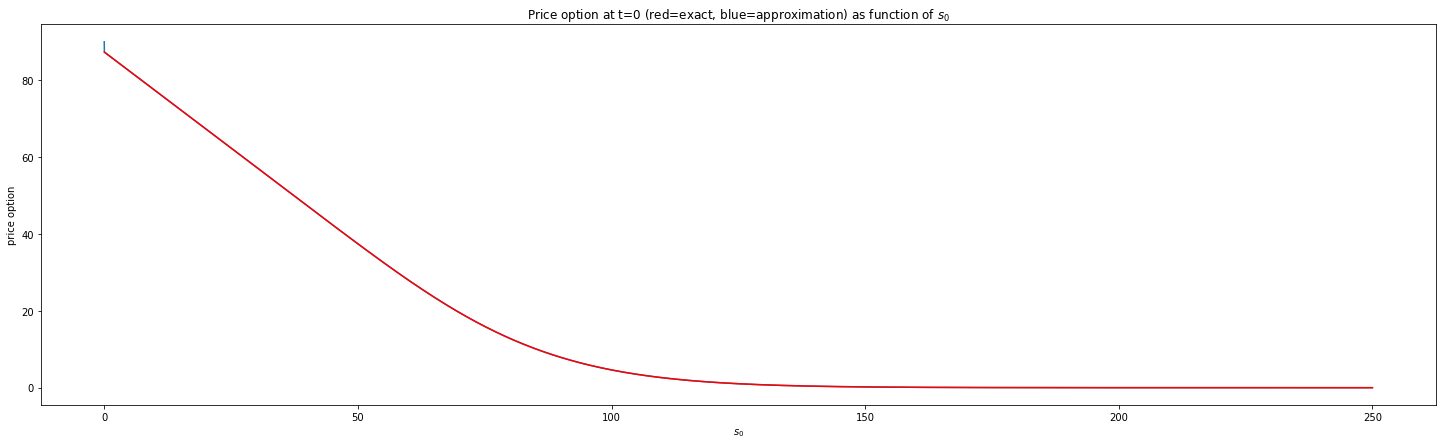

In [8]:
ax = put.plot_price()
bs = BlackScholesOptionPrice(strike, r, sigma)
price = bs.price_put(put.S[1:], T)
ax.plot(put.S[1:], price, color="r")
ax.set_title("Price option at t=0 (red=exact, blue=approximation) as function of $s_0$")
ax.set_xlabel("$s_0$")
ax.set_ylabel("price option")

### 3.2.2 Application to European call option

In [9]:
s_0 = 100
strike = 100
sigma = 0.3
r = 0.01
T = 1
Smax = 250
call_boundary_maturity = lambda s: np.maximum(s - strike, 0)
call_boundary_smax = lambda t: Smax - strike
call = SolvePDEBoundaryNumerically(
    Smax=Smax,
    dS=0.005,
    K=strike,
    dT=0.005,
    T=T,
    r=r,
    sigma=sigma,
    boundary_equation_maturity=call_boundary_maturity,
    boundary_equation_smax=call_boundary_smax,
)

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:145: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


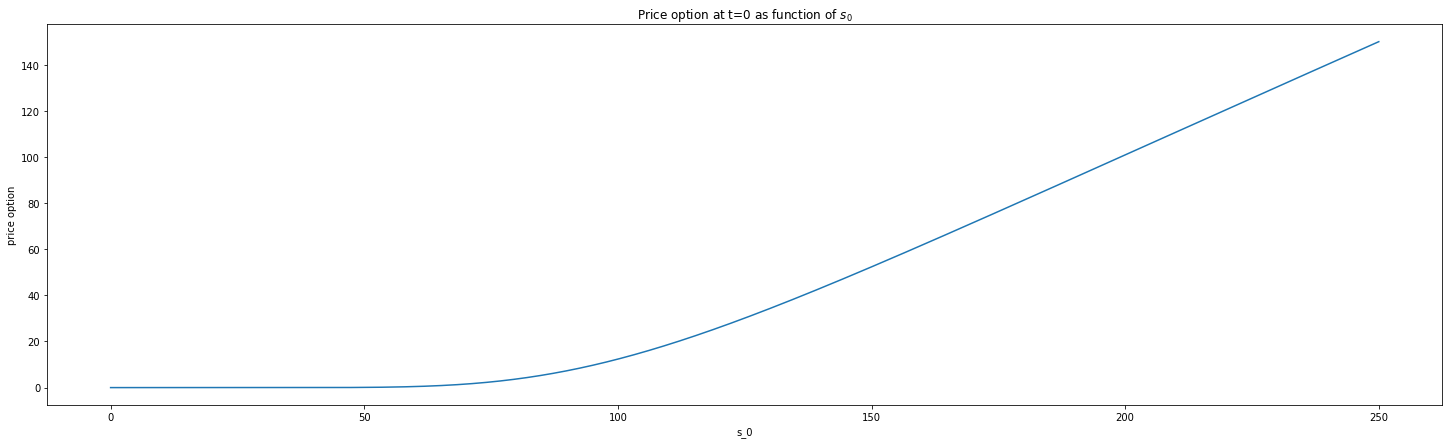

In [10]:
call.plot_price()

In [11]:
t = 0
s = 100
call.price_specific_point(t, s)

The closest point to specified s on the grid is 100.0 and the closest point to specified t is 0.0
The (approximation to the) price of the option at t=0.0, S_t=100.0 is 12.360349958292826


12.360349958292826

In [12]:
current_stock_price = s
time_to_maturity = T - t
bs = BlackScholesOptionPrice(strike, r, sigma)
price = bs.price_call(current_stock_price, time_to_maturity)
print(
    f"Exact price of call for strike={strike}, r={100 * r}%, sigma={100 * sigma}%, S_t={current_stock_price}, T-t={time_to_maturity}: {np.round(price , 2)}"
)

Exact price of call for strike=100, r=1.0%, sigma=30.0%, S_t=100, T-t=1: 12.37
